# Проект для интернет магазина «Пока все ещё тут»

**Материалы**
Презентация: https://disk.yandex.ru/i/knaUAkmbMX-7sA

## Задача
Интернет-магазин товаров для дома «Пока все ещё тут» в срочном порядке ищет аналитиков. Вы поможете нашему магазину стать лучше, а клиентам — обустроить дом своей мечты. Наши ближайшие задачи — выявление профилей покупателей, а также их сегментация и анализ.

**1 Предобработка данных** 
- Открыть и изучить данные.
- Проверить и исправить пропущенные значения
- Проверить датасет на дубликаты
- Проверить тип данных. Если есть необходимость изменить тип.
- Найти и устранить редкие и выбивающиеся значения

**2 Исследовательский анализ данных** \
Выделить основные показатели интернет-магазина и изучить динамику. Интерпритировать результат.

- Выручка
- Средний чек
- Средняя выручка с покупателя
- Категории товаров

**3 Сегментация покупателей на основе истории их покупок** \
Обнаружить группы клиентов, похожих друг на друга, охарактеризовать их, предложить рекомендации по работе с каждой группой.

- Кто часто совершает сезонные покупки? Делают ли повторные?
- Кто делает несколько заказов?
- Кто часто оформляет заказа?
- Кто делает крупные покупки?
- Какая у них структура потребления?
- По каким категориям товаров делятся покупатели?

**4 Проверка статистических гипотез** \
Первая гипотеза

H0: Есть разница в средней выручке между сегментами \
H1: Нет разницы в средней выручке между сегментами

Вторая гипотеза

H0: Есть разница в частоте оформления заказов между сегментами \
H1: Нет разницы в частоте оформления заказов между сегментами

**5 Выводы и рекомендации** \
Описать общие выводи и написать рекомендации для интернет-магазина «Пока все ещё тут».

### Предобработка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re
import datetime as dt
import json
from scipy import stats as st


import warnings
warnings.filterwarnings("ignore")

In [2]:
try:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/ecom_dataset_upd.csv', sep=',')
    
except:    
    df = pd.read_csv('C:\\Users\\bazel\\ecom_dataset_upd.csv', sep=',')

In [3]:
df

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0
...,...,...,...,...,...,...
7469,2020013021,63208953-a8e4-4f77-9b47-3a46e7b72eee,104002,томата (помидор) Черниченский черри № 116 сорт...,2,38.0
7470,2020013022,d99d25f1-4017-4fcd-8d29-c580cc695a1a,107336,Дендробиум Санок Анна Грин 1 ствол d-12 см,1,869.0
7471,2020013102,2c9bd08d-8c55-4e7a-9bfb-8c56ba42c6d6,106336,Подставка для обуви резиновая Attribute 80x40 ...,1,354.0
7472,2020013112,cdd17932-623e-415f-a577-3b31312fd0e2,102002,Тагетис крупноцветковый рассада однолетних цве...,1,128.0


Магазин продает товары для дома

In [4]:
df.isna().sum()

date           0
customer_id    0
order_id       0
product        0
quantity       0
price          0
dtype: int64

Пропусков нет, отлично

In [5]:
df.duplicated().sum()

0

In [6]:
df = df.drop_duplicates(subset=['order_id','product', 'date'], keep='first')

In [7]:
df = df.drop_duplicates(subset=['order_id','product', 'customer_id'], keep='first')

Удаляем дубликаты по времени и по id пользователя

In [8]:
df

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0
...,...,...,...,...,...,...
7469,2020013021,63208953-a8e4-4f77-9b47-3a46e7b72eee,104002,томата (помидор) Черниченский черри № 116 сорт...,2,38.0
7470,2020013022,d99d25f1-4017-4fcd-8d29-c580cc695a1a,107336,Дендробиум Санок Анна Грин 1 ствол d-12 см,1,869.0
7471,2020013102,2c9bd08d-8c55-4e7a-9bfb-8c56ba42c6d6,106336,Подставка для обуви резиновая Attribute 80x40 ...,1,354.0
7472,2020013112,cdd17932-623e-415f-a577-3b31312fd0e2,102002,Тагетис крупноцветковый рассада однолетних цве...,1,128.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5587 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         5587 non-null   int64  
 1   customer_id  5587 non-null   object 
 2   order_id     5587 non-null   int64  
 3   product      5587 non-null   object 
 4   quantity     5587 non-null   int64  
 5   price        5587 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 305.5+ KB


In [10]:
df["date"] = pd.to_datetime(df['date'], format="%Y%m%d%H")

In [11]:
print(df['date'].min())
print(df['date'].max())

2018-10-01 00:00:00
2020-01-31 15:00:00


Данные от 01.10.2018 до 31.01.2020 (15:00)

In [12]:
df['product'] = df['product'].str.lower()

### Исследовательский анализ данных

#### Изучение выручки

In [13]:
df['price'].describe()

count     5587.000000
mean       531.347071
std        973.306691
min          9.000000
25%         90.000000
50%        150.000000
75%        524.000000
max      14917.000000
Name: price, dtype: float64

In [14]:
df['sales'] = df['price'] * df['quantity']

Так как у нас представлены только цены на товар и количество товара в заказе, сделаем столбец с стоимостью заказа 

In [15]:
df.sales.describe()

count      5587.000000
mean        829.978238
std        9171.011013
min           9.000000
25%         120.000000
50%         194.000000
75%         734.000000
max      675000.000000
Name: sales, dtype: float64

Максимальная цена 675000, странно. 

In [16]:
df[df['sales'] == 675000]

,date,customer_id,order_id,product,quantity,price,sales
5456,2019-06-18 15:00:00,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,"вантуз с деревянной ручкой d14 см красный, bur...",1000,675.0,675000.0


1000 вантузов - это тестовый заказ, поэтому удалим его.

In [17]:
df = df.query('sales != 675000')

In [18]:
df[df['price'] == 14917]

,date,customer_id,order_id,product,quantity,price,sales
5992,2019-07-29 17:00:00,0d87f4ae-465a-4fac-81e6-5d629761783e,72139,сушилка уличная leifheit 85210 linomatic v 400...,1,14917.0,14917.0


А они действительно в +- такую цену. Пруф: https://san-premium.ru/catalog/model/6590/sushilka-dlya-belya-ulichnaya-leifheit-linomatic-v-400-40m-85210/

In [19]:
df['customer_id'].nunique()

2450

Это мы посмотрели уникальных пользователей

In [20]:
df['sales'].sum()

3962088.4166666665

А это сколько всего денег потратили. Теперь создадим столбцы с распределением по годам, месяцам, а так же сезонам.

In [21]:
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['date_day'] = df['date'].dt.date

In [22]:
def season(month):
    if  3 <= month <= 5:
        return 'весна'
    elif 6 <= month <= 8:
        return 'лето'
    elif 9 <= month <= 11:
        return 'осень'
    else:
        return "зима" 

In [23]:
df['season'] = df['month'].apply(season)

In [24]:
temp = df.groupby(['month', 'year', 'season'])['sales'].sum().reset_index()
temp

,month,year,season,sales
0,1,2019,зима,235432.000000
1,1,2020,зима,174036.333333
2,2,2019,зима,307996.000000
3,3,2019,весна,253589.000000
4,4,2019,весна,318171.000000
5,5,2019,весна,237955.000000
6,6,2019,лето,228023.000000
7,7,2019,лето,234932.000000
8,8,2019,лето,172443.000000
9,9,2019,осень,181082.000000


In [25]:
temp[temp['year'] == 2018]['sales'].sum()

1067774.0

In [26]:
temp[temp['year'] == 2019]['sales'].sum()

2720278.0833333335

In [27]:
temp[temp['year'] == 2020]['sales'].sum()

174036.33333333334

In [28]:
temp[temp['season'] == 'зима']['sales'].sum()

1276865.6666666667

In [29]:
temp[temp['season'] == 'лето']['sales'].sum()

635398.0

In [30]:
temp[temp['season'] == 'осень']['sales'].sum()

1240109.75

In [31]:
temp[temp['season'] == 'весна']['sales'].sum()

809715.0

In [32]:
temp[(temp['season'] == 'зима') & (temp['year'] != 2020) & (temp['year'] != 2018)]['sales'].sum()

746313.3333333333

In [33]:
temp[(temp['season'] == 'осень') & (temp['year'] != 2020) & (temp['year'] != 2018)]['sales'].sum()

528851.75

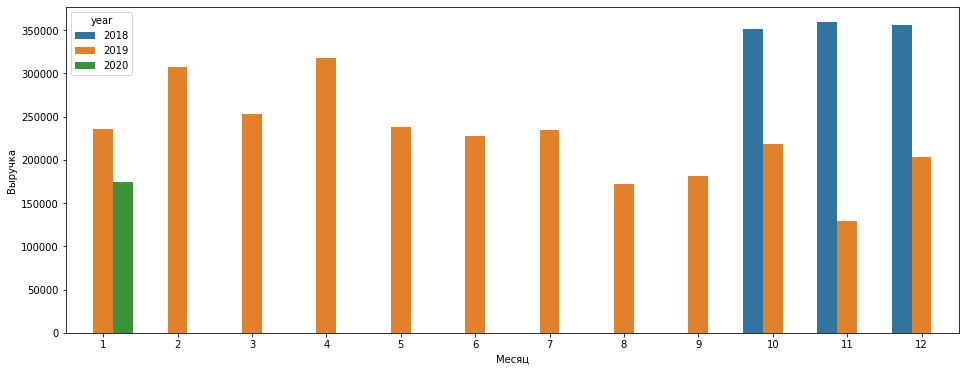

In [34]:
plt.figure(figsize=(16, 6))
sns.barplot(x = 'month', y = 'sales', hue = 'year', ci=None, data = temp)
plt.ylabel('Выручка')
plt.xlabel('Месяц')
plt.show()

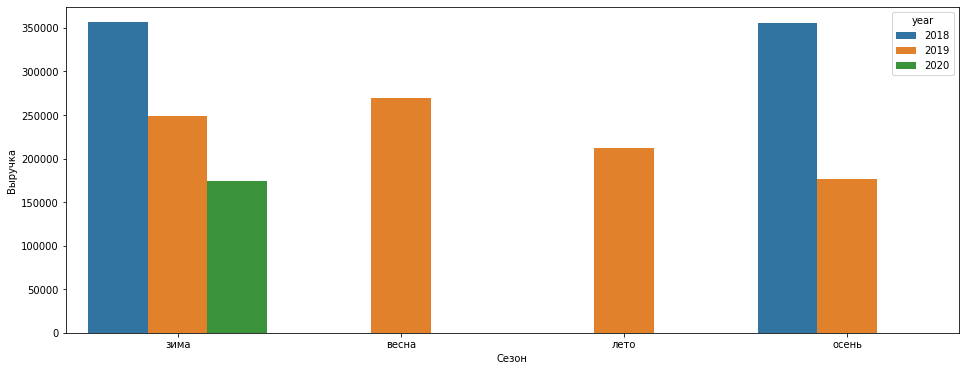

In [35]:
plt.figure(figsize=(16, 6))
sns.barplot(x = 'season', y = 'sales', hue = 'year', ci=None, data = temp)
plt.ylabel('Выручка')
plt.xlabel('Сезон')
plt.show()

Получили график трат по месяцам, годам и сезонам. Самый прибыльные месяца - Июнь 2019 и Октябрь 2018. Самый прибыльный сезон для магазина - зима и осень в 2018, в 2019 - весна. 

#### Изучение товаров и разбиение заказов по категориям

In [36]:
df['product'].nunique()

2340

2341 уникальных позиций. Но это на первый взгляд.

In [37]:
df['product_reduction'] = df['product'].apply(lambda x: x.split()[:2]).apply(lambda x: ' '.join(x))

In [38]:
df.head()

,date,customer_id,order_id,product,quantity,price,sales,month,year,date_day,season,product_reduction
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,142.0,10,2018,2018-10-01,осень,комнатное растение
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,194.0,10,2018,2018-10-01,осень,комнатное растение
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,112.0,10,2018,2018-10-01,осень,радермахера d-12
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,179.0,10,2018,2018-10-01,осень,хризолидокарпус лутесценс
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,112.0,10,2018,2018-10-01,осень,циперус зумула


In [39]:
df.product_reduction.nunique()

926

Сократили наименования позиций до 2х слов, теперь значительно стало проще

In [40]:
df['product_reduction'].unique()

array(['комнатное растение', 'радермахера d-12',
       'хризолидокарпус лутесценс', 'циперус зумула', 'шеффлера лузеана',
       'юкка нитчатая', 'настенная сушилка', 'таз пластмассовый',
       'чехол для', 'вешалка для', 'сушилка для', 'чехол eurogold',
       'крючок одежный', 'корзина мягкая', 'мини-сковорода marmiton',
       'сковорода алюминиевая', 'стеклянная крышка', 'доска гладильная',
       'сумка-тележка 2-х', 'многолетнее растение', 'рассада зелени',
       'муляж "райские', 'муляж банан,', 'муляж виноград', 'муляж гранат',
       'муляж груша', 'муляж груша,', 'муляж зеленое', 'муляж клубника',
       'муляж красное', 'муляж лимон,', 'муляж мандарин,', 'муляж перец,',
       'муляж персики', 'муляж томат,', 'муляж черешня',
       'щетка-сметка 3-х', 'щетка-сметка 4-х', 'сумка для',
       'тарелка обеденная', 'вилка столовая', 'ложка столовая',
       'ложка чайная', 'нож столовый', 'герань домашняя', 'ерш для',
       'пеларгония зональная', 'котел алюминиевый', 'сукк

In [41]:
garden = ['комнатное растение',
  'радермахера d-12',
  'хризолидокарпус лутесценс',
  'циперус зумула',
  'мединилла магнифика',
  'шеффлера лузеана',
  'шеффлера голд',
  'юкка нитчатая',
  'многолетнее растение',
  'рассада зелени',
  'рассада пеларгония',
  'рассада пряной',
  'рассада огурца',
  'рассада томата',
  'вербена рассада',
  'газания рассада',
  'виола рассада',
  'рассада остеоспермум',
  'рассада капусты',
  'рассада перца',
  'рассада капусты',
  'рассада тыквы',
  'рассада огурец',
  'рассада арбуза', 'рассада дыни', 'рассада клубники',
       'циния рассада',
  'флокс метельчатый', 'агератум рассада',
       'алиссум рассада', 'колеус рассада',
  'цинерания рассада', 'лобелия рассада',
  'петуния рассада',
  'портулак рассада', 'астра рассада',
  'аргирантерум рассада', 'левкой рассада',
  'примула рассада',
  'рассада кабачка', 'сальвия рассада',
  'рассада патиссона',
  'рассада в',
  'рассада кабачок',
  'герань домашняя',
  'пеларгония зональная',
  'пеларгония душистая',
  'пеларгония розоцветная',
  'пеларгония d-13',
  'пеларгония грандифлора',
  'пеларгония розебудная',
  'пеларгония toscana',
  'пеларгония angeleyes',
  'пеларгония плющелистная',
  'пеларгония тюльпановидная',
  'суккулент микс',
  'эхеверия перл',
  'эхеверия микс',
  'эхеверия лила',
  'эвкалипт гунни',
  'эвкалипт сильвердроп',
  'адиантум лиза',
  'кампанула махровая',
  'калатея микс',
  'калатея кроката',
  'нолина в',
  'хлорофитум d-13',
  'хлорофитум d-7',
  'цикламен d-13',
  'цикламен, цвет',
  'цикламен d-12',
  'цикламен комнатный',
  'цикламен розовый',
  'цикламен d-15',
  'глоксиния d-13',
  'азалия индика',
  'гортензия микс',
  'гортензия метельчатая',
  'хризантема космо',
  'хризантема белая',
       'хризантема красная',
  'хризантема корейская',
  'хризантема кустовая',
  'хризантема сиреневая',
  'мирт d-20',
  'мирт d-9',
  'цветущее комнатное',
  'кориандр в',
  'кориандр стимул',
  'иссоп лекарственный',
  'сантолина d-9',
  'аспарагус d-12',
  'аспарагус спренжери',
  'афеляндра скуарроса',
  'антуриум андрианум',
  'антуриум тропик',
  'молодило микс',
  'молодило в',
  'фиалка d-11',
  'фиалка карнавал',
  'фиалка микс',
  'фиалка d-9',
  'фиалка химера',
  'фиалка махровая',
  'гербера d-13',
  'гербера комнатная',
  'душица обыкновенная',
  'мелисса лекарственная',
  'роза кордана',
  'роза патио',
  'роза палас',
  'роза мини',
  'роза кустовая',
  'роза одноголовая',
  'роза садовая',
  'роза чайно-гибридная',
  'бегония элатиор',
  'бегония ампельная,',
  'бегония клубневая',
  'бегония вечноцветущая',
  'розмарин d-12',
  'розмарин d-9',
  'розмарин в',
  'альбука спиралис',
  'бальзамин новогвинейский',
  'бальзам для',
  'бальзамин валера',
  'крассула d-17',
  'крассула овата',
  'артемизия (полынь',
  'лаванда d-9',
  'лаванда торх',
  'лаванда в',
  'мята d-9',
  'мята перечная',
  'мята колосистая',
       'мята aura',
  'мята махито',
  'каланхое каландива',
  'примула акаулис',
  'примула желтая',
  'примула комнатная',
  'дендробиум санок',
  'дендробиум фиолетовый',
  'дендробиум яблоневый',
  'калоцефалус брауни',
  'каллуна гарден',
  'капсикум сальса',
  'мимоза стыдливая',
  'соланум d-10',
  'бархатцы веселая',
  'космея очаровашка',
  'космея клюквенный', 'космея кэнди',
  'космея лимонад', 'космея попсокс', 'космея снежный',
  'морковь детская',
  'настурция драгоценность',
  'настурция лунный', 'настурция орхидное',
  'огурец засолочный',
  'огурец алтай',
  'огурец аристократ', 'огурец багратион', 'огурец боярский',
  'огурец закусочный',
  'петуния каскад',
  'петуния гибридная', 'петуния махровая',
  'петуния surprice', 'петуния sweetunia',
  'петуния простая', 'петуния изи',
  'петуния surfinia',
  'петуния крупноцветковая', 'петуния orange', 'петуния sanguna',
  'петуния pegasus',
       'петуния surprise',
  'петуния potunia',
  'петуния рассада',
  'петуния свитуния', 'петуния baby', 'петуния bordeaux',
       'петуния crazytunia', 'петуния sky',
  'петуния ампельная',
  'алиссум (лобулярия)',
  'алиссум скальный',
  'гвоздика турецкая',
  'гвоздика стандартная',
  'гвоздика травянка',
  'гвоздика садовая',
  'годеция рембранд',
  'календула пинк',
  'календула бронзовая',
  'календула суприм',
  'капуста декоративная',
  'капуста белокочанная',
  'капуста брокколи',
  'капуста цветная',
  'капуста брюссельская',
  'капуста кольраби',
  'кореопсис толл',
  'кореопсис золотой',
  'лапчатка огненное',
  'лапчатка травянистая',
  'львиный зев',
  'флокс друммонда',
  'флокс растопыренный',
  'флокс метельчатый',
  'цинерария серебряная',
  'эшшольция карминный',
  'диффенбахия d-12',
  'диффенбахия камилла',
  'фаленопсис королевский',
  'фаленопсис люкс',
  'фаленопсис желтый',
  'подсолнечник низкорослый',
  'пуансетия d-12',
  'гиностемма укорененный',
  'ель канадская',
  'кипарисовик лавсона',
  'аптения d-10',
  'аптения d-12',
  'новогоднее дерево',
  'пуансеттия d-12',
  'пуансеттия d-15',
  'пуансеттия d-23',
  'пуансеттия в',
  'скиммия японская',
  'фиттония скелетон',
  'тимьян d-9',
  'тимьян овощной',
  'тимьян крымский',
  'тимьян в',
  'алоэ вера',
  'спатифиллум шопен',
  'спатифиллум d-7',
  'спатифиллум свит',
  'фикус каучуконосный',
  'кодонанта укорененный',
  'гимнокалициум микс',
  'кофе арабика',
  'эхинокактус грузони',
  'крокусы pickwick',
  'гипсофила аврора',
  'калибрахоа ампельная',
  'калибрахоа aloha', 'калибрахоа mini', 'калибрахоа sweet',
  'калибрахоа bloomtastic', 'калибрахоа rave',
  'эпипремнум ауреум',
  'аквилегия обыкновенная',
  'аквилегия махровая',
  'базилик застольный',
 'базилик смесь',
  'базилик зеленый', 'базилик овощной',
       'базилик пурпурные',
  'горох амброзия',
  'земляника барон',
  'земляника садовая',
  'незабудка смесь',
  'седум почвопокровный',
  'седум (очиток)',
  'томат балконное',
  'томата (помидор)',
  'томат государь', 'томат детерминантный',
  'укроп обильнолистный',
  'нефролепис бостон',
  'калла крупноцветковая',
  'декабрист в',
  'тюльпан louvre',
  'гиацинт blue',
  'вербена микс',
  'вербена ампельная,',
  'вербена крупноцветковая', 'вербена red',
  'вербена fuhcsia',
  'вербена white',
  'однолетнее растение',
  'чабер bolero',
  'бакопа ампельная',
  'бакопа ампельная,',
  'ранункулус клуни',
  'овсянница сизая',
  'георгина черная',
  'смолевка звездный',
  'цинния ацтек', 'цинния хаага',
  'цинния коралловая',
       'цинния оранжевый',
  'лавр в',
  'лавр нобилис',
  'лавр d-9',
  'вербейник монетчатый',
  'виола рогатая',
  'колокольчик карпатский',
  'колокольчик персиколистный',
  'котовник блю',
  'эхинацея микс',
  'ясколка войлочная',
  'лилейник высокорослый',
  'папоротник страусник',
  'платикодон махровый',
  'энотера миссурийская',
  'фуксия ампельная',
  'фуксия blue', 'фуксия dark',
       'фуксия swingtime',
  'фуксия e4',
  'фуксия ампельная', 'фуксия прямостоячая', 'фуксия bella',
  'цитрофортунелла кумкват',
  'пеперомия d-12',
  'дыня алтайская', 'дыня дина', 'дыня золотой',
       'дыня колхозница', 'дыня медовый', 'дыня награда',
  'дыня млада', 'дыня симпатия',
  'синнингия (глоксиния)',
  'гардения d-9',
  'лобелия ампельная',
  'лобелия регатта',
  'табак душистый',
  'табак бордовый', 'табак курительный',
  'девичий виноград',
  'мускари white',
  'пиретрум робинсон',
  'тагетис крупноцветковый',
  'муррайя d-9',
  'астра альпийская',
  'вероника колосковая',
  'целозия гребенчатая',
  'арбуз волгоградец',
  'арбуз огонек', 'арбуз сибирские', 'арбуз холодок', 'арбуз шуга',
  'баклажан самурай',
  'клубника альба', 'клубника мара', 'клубника хоней',
  'патиссон зонтик',
  'патиссон диск', 'патиссон нло',
  'маттиола ночная',
  'лук порей',
  'джункус пенсил',
  'драцена фрагранс',
  'фатсия японская',
  'фатсия d-17',
  'хоста микс',
  'гайлардия крупноцветковая',
  'монарда гибридная',
  'монарда в',
  'нивянник (ромашка)',
  'рудбекия тайгер',
  'барвинок синий',
  'осина обыкновенная,',
  'сциндапсус в',
  'пряные травы',
  'бузульник пржевальского',
  'камнеломка арендса',
  'камнеломка тенистая',
  'солидаго желтый',
  'физостегия вергинская',
  'бадан сердцелистный',
  'лен небесная',
  'лантана d-13',
  'лантана в',
  'лаватера монт',
  'анемона белый',
  'буддлея вейера',
  'валериана лекарственная',
  'змееголовник молдавский',
  'любисток удалец',
  'петрушка корневая', 'петрушка листовая',
  'петрушка итальянский',
  'сельдерей листовой',
  'шалфей овощной',
  'вигна лилиана',
  'кабачок изумруд',
  'тыква крупноплодная',
  'хамедорея d-12',
  'зверобой продырявленный',
  'импатиенс нью',
  'клен ложноплатановый',
  'замиокулькас d-15',
  'амариллис red',
  'салат рукола',
  'пахира акватика',
  'литопс микс']

In [42]:
hoz = ['настенная сушилка',
  'антинакипин для',
  'таз пластмассовый',
  'таз алюминиевый,',
  'чехол для',
  'чехол eurogold',
  'вешалка для',
  'вешалка деревянная', 'вешалка с',
  'вешалка-плечики без',
  'вешалка напольная',
  'вешалка-стойка №',
  'вешалка-плечики 3',
  'вешалка настенная', 'вешалка самоклеющая',
  'вешалка гардеробная',
  'вешалка-сушилка gimi',
  'вешалка металлическая',
  'вешалка valiant',
  'вешалка-перекладина valiant',
  'вешалка ника',
  'вешалка надверная',
  'вешалка-стойка сакура',
  'вешалка -',
  'сушилка для',
  'шнур хозяйственный',
  'сушилка мульти',
  'сушилка meliconi',
  'сушилка уличная',
  'крючок одежный',
  'крючок проволочный',
  'корзина мягкая',
  'корзина для', 'корзина пластиковая',
  'корзина на',
  'корзина city',
  'доска гладильная',
  'щетка-сметка 3-х', 'щетка-сметка 4-х',
  'щетка-сметка с',
  'ерш для',
  'ёрш унитазный',
  'ёрш для',
  'ёрш радиаторный',
  'ёрш бутылочный',
  'набор прищепок',
  'набор кружек',
  'набор фужеров',
  'набор вешалок',
  'набор ковров',
  'набор сверел',
  'набор эмалированных',
  'набор кухонных',
  'набор бокалов', 'набор стаканов',
  'набор ножей',
  'набор форм',
  'набор столовых',
  'набор махровых',
  'набор vileda',
  'набор прецизионных',
  'набор посуды',
  'набор для',
  'набор инструментов',
  'подкладка под',
  'мусорный контейнер',
  'перчатки латексные',
  'перчатки резиновые',
  'перчатки fabrikators',
  'перчатки latex',
  'перчатки extra',
  'стремянка алюминиевая',
  'стремянка металлическая',
  'стремянка бытовая',
  'стремянка 5',
  'стремянка-табурет алюминиевая',
  'стремянка framar',
  'стремянка eurogold',
  'стремянка colombo',
  'стремянка scab',
  'стремянка dogrular',
  'стремянка 7',
  'гладильная доска',
  'гладильная доска-стремянка',
  'лестница-стремянка dogrular',
  'лестница-стремянка примус',
  'лестница-стремянка sarayli',
  'стяжка оконная',
  'комплект для',
  'комплект постельного',
  'комплект махровых',
  'плечики пластмассовые',
  'крепеж для',
  'пружина дверная',
  'петля приварная',
  'петля-стрела пс-286',
  'петля рояльная',
  'стиральный биопорошок',
  'чистящий крем',
  'щетка для',
  'щетка-утюжок с',
  'щетка палубная',
  'щетка хозяйственная',
  'щетка универсальная',
  'щётка для',
  'стремянки colombo',
  'жидкое мыло',
  'пена для',
  'подрукавник складной', 'подрукавник gimi', 'подрукавник leifheit',
  'сверло-фреза, 6', 'сверло-фреза, 8',
  'зубная паста',
  'веник сорго',
  'веник для',
  'швабра многофункциональная',
  'швабра многофункциональная,',
  'швабра сальса',
  'швабра для',
  'швабра хозяйственная',
  'швабра leifheit',
  'насадка для',
  'насадка к',
  'насадка-отжим пластиковая',
  'насадка-моп rozenbal',
  'насадка на',
  'ножеточка универсальная',
  'вешалка-плечики без',
  'вешалка-плечики 3',
  'настольная гладильная',
  'холодная сварка',
  'шнур резиновый',
  'урна уличная',
  'урна-пепельница из',
  'мыло-скраб с',
  'мыло жидкое',
  'мыло ручной',
  'сметка с',
  'измерительный алюминиевый',
  'измерительный угольник,',
  'линейка, длина',
  'средство для',
  'средство против',
  'бензин для',
  'паста для',
  'паста зубная',
  'петля-стрела пс-286',
  'держатель для',
  'пробка для',
  'вешалки мягкие',
  'губка спираль',
  'антижир posh',
  'универсальное средство',
  'ролик для',
  'сменный блок',
  'термометр на', 
  'термометр уличный',
  'шило с',
  'кухонные ножницы',
  'ароматизированное средство',
  'бальзам для',
  'рассекатель пламени',
  'ополаскиватель для',
  'сетка для',
  'ручка-скоба рс-100',
  'мыльница пластмассовая',
  'многофункциональный инструмент',
  'кольца для',
  'вантуз черный',
  'вантуз с',
  'кондиционер для',
  'защитная соль',
  'гипоаллергенный концентрированный',
  'лестница-стремянка dogrular',
  'лестница-стремянка примус',
  'лестница стремянка',
  'лестница-стремянка sarayli',
  'совок и',
  'совок металический', 
  'совок для',
  'штанга для',
  'увлажняющая маска',
  'штангенциркуль 150',
  'рукав для',
  'бак для',
  'концентрат для',
  'окномойка с',
  'фал капроновый',
  'сменная насадка',
  'подвесное кашпо',
  'автоматическая щетка',
  'тряпкодержатель с',
  'бельевые прищепки',
  'сверло по',
  'фиксатор-шар хром',
  'отжим для',
  'шпагат полипропиленовый',
  'ванна 70',
  'прищепки для',
  'покрытие для',
  'веревка полипропиленовая',
  'мешок для',
  'отбеливатель пероксоль',
  'ручка-скоба рс-100',
  'ручка мебельная',
  'пьезозажигалка с',
  'решетка вентиляционная',
  'запасная насадка',
  'уголок оконный',
  'вакуумный пакет',
  'тряпка для',
  'основание для',
  'стяжки для',
  'шпингалет 80']

In [43]:
pos = ['мини-сковорода marmiton',
  'сковорода алюминиевая',
  'сковорода scovo',
  'сковорода hard',
  'стеклянная крышка',
  'тарелка обеденная',
  'тарелка десертная', 'тарелка суповая',
  'вилка столовая',
  'ложка столовая',
  'ложка чайная',
  'ложка обувная',
  'ложка кухонная',
  'нож столовый',
  'нож для',
  'нож кухонный',
  'нож универсальный',
  'нож поварской',
  'котел алюминиевый',
  'дозатор для',
  'кувшин пластмассовый',
  'кувшин luminarc',
  'толкушка для',
  'толкушка деревянная',
  'банка со',
  'банка с',
  'банка стеклянная',
  'банка из',
  'банка рондо',
  'противень прямоугольный',
  'вкладыши для',
  'tepмокружка avex',
  'контейнер для',
  'контейнер герметичный',
  'ведро для',
  'ведро пластиковое',
  'ведро ampari',
  'ведро овальное',
  'ведро без',
  'ведро полимербыт',
  'ведро резинопластиковое',
  'масленка коровка',
  'корыто оцинкованное',
  'салатник luminarc',
  'салатник романтик',
  'салатник амори',
       'салатник колорама', 'салатник рапсоди',
  'салатник воларэ',
  'салатник эмпилабль',
  'салатник аспен',
  'салатник карин',
  'чайный набор',
  'рыбочистка металлическая',
  'рыбочистка с',
  'терка webber',
  'терка для',
  'кружка 350',
  'кружка для', 'кружка luminarc',
  'кружка нордик',
  'кружка прозрачная',
  'кружка бамбук',
  'кружка мерная',
  'кружка марли',
  'кружка о',
  'кружка тачки',
  'кружка с',
  'лопатка attribute', 'лопатка c',
  'салфетница металлическая',
  'стакан низкий',
  'стакан пластмассовый',
  'стакан для',
  'столовая ложка',
  'чайная ложка',
  'овощечистка с',
  'лоток для',
  'лоток knit',
  'ковш пластмассовый',
  'кисточка силиконовая',
  'скребок кондитерский',
  'скребок 44',
  'скребок для',
  'картофелемялка металлическая',
  'жестяная банка',
  'миска пластмассовая',
  'миска фазенда',
  'миска для',
  'пресс для',
  'термостакан webber',
  'защитный экран',
  'термокружка alpenkok',
  'термокружка вакуумная',
  'термокружка яромир',
  'термокружка забава',
  'термос со',
  'термос 1л',
  'фарфоровая кружка',
  'столовый нож',
  'блюдце утро',
  'бульонница luminarc',
  'разделочная доска',
  'доска разделочная',
  'емкость для',
  'модульная стеклянная',
  'просеиватель для',
  'кастрюля чугунная',
  'кастрюля круглая',
  'кастрюля эмалированная,',
  'кастрюля алюминиевая',
  'кастрюля эмалированная',
  'хлебница деревянная',
  'хлебница webber',
  'хлебница пластмасовая',
  'форма для',
  'форма аlpenkok',
  'орехоколка viva',
  'скалка силиконовая',
  'венчик с',
  'сито webber',
  'тортница curver',
  'блюдо pasabahce',
  'сотейник алюминиевый',
  'бидон пластмассовый',
  'ваза маскарад',
  'отделитель косточек',
  'шприц кондитерский',
  'крышка оцинкованная',
  'сахарница фарфоровая',
  'универсальный нож',
  'половник attribute',
  'мерный стакан']

In [44]:
bags = ['сумка-тележка 2-х',
  'сумка-тележка хозяйственная',
  'сумка-тележка 3-х',
  'сумка-тележка gimi',
  'сумка-тележка delta',
  'сумка-тележка twin',
  'сумка-тележка brava',
  'сумка для',
  'сумка хозяйственная',
  'тележка багажная',
  'тележка хозяйственная',
  'кофр малый',
  'кофр для',
  'ящик для',
  'ящик почтовый',
  'короб стеллажный',
  'коробка прямоугольная',
  'коробка infinity',
  'коробка для',
  'складная картонная',
  'корзинка с']

In [45]:
int = ['муляж "райские', 'муляж банан,', 'муляж виноград', 'муляж гранат',
       'муляж груша', 'муляж груша,', 'муляж зеленое', 'муляж клубника',
       'муляж красное', 'муляж лимон,', 'муляж мандарин,', 'муляж перец,',
       'муляж персики', 'муляж томат,', 'муляж черешня',
  'муляж виноград,', 'муляж вишня,', 'муляж персик,',
  'муляж перец', 'муляж апельсин', 'муляж яблоко',
  'муляж тыквы', 'муляж лимон', 'муляж вишня', 'муляж мандарин', 'муляж чеснок',
  'муляж ананас', 'муляж баклажан', 'муляж банан', 'муляж манго',
       'муляж морковь', 'муляж персик', 'муляж желудь', 'муляж яблоко,', 'муляж оранжевое',
  'муляж булка', 'муляж лайм', 'муляж томат', 'муляж долька', 'муляж хлеб',
  'коврик придверный',
       'коврик bacchetta', 'коврик интерьерный', 'коврик хлопковый',
  'коврик влаговпитывающий', 'коврик резиновый', 'коврик придверный,',
  'коврик противоскользящий', 'коврик для', 'коврик sochi',
  'коврик ворсовый', 'коврик кухонный',
  'коврик dasch', 'коврик в',
  'плед флисовый',
  'скатерть династия',
  'скатерть лувр',
  'скатерть из',
  'скатерть азалия',
  'скатерть прямоугольная',
  'скатерть сидней',
  'скатерть towa',
  'подушка декоративная',
  'скатерть джулия',
  'скатерть 350х180',
  'скатерть арлет',
  'скатерть виниловая',
  'скатерть ажурная',
  'скатерть беатрис',
  'скатерть 150х120',
  'скатерть муза',
  'скатерть meiwa',
  'скатерть dasch',
  'скатерть 350х150',
  'скатерть круглая',
  'скатерть 180',
  'скатерть жаклин',
  'скатерть рим',
  'ковер придверный',
  'ковёр придверный',
  'готовая скатерть',
  'искусственный цветок',
  'цветок искусственный',
  'искусственный лист',
  'простыня на',
  'простыня двуспальная',
  'простыня сатиновая',
  'штора текстильная',
  'штора для',
  'штора со',
  'декоративная композиция',
  'декоративная коробка',
  'подушка 40х40',
  'полотенце кухонное',
  'полотенце махровое',
  'полотенце прессованное',
  'салфетка protec',
  'салфетка камушки',
  'салфетка махровая',
  'салфетка на',
  'ковёр придверный',
  'карниз алюминиевый',
  'карниз для',
  'подголовник для',
  'подголовник bacchetta',
  'наматрасник wellness',
  'наматрицник-чехол natures',
  'сиденье в',
  'сиденье для',
  'сервировочная салфетка',
  'халат вафельный',
  'комод эльфпласт',
  'покрывало жаккард',
  'покрывало karna',
  'покрывало стеганый',
  'подставка для',
  'одеяло silver',
  'одеяло wellness',
  'фоторамка alparaisa',
  'этажерка 2',
  'этажерка для',
  'этажерка цветочная',
  'простынь вафельная',
  'полки qwerty',
  'ключница картина',
  'махровое полотенце',
  'искусственная лиана',
  'искусственная композиция',
  'нетканые салфетки',
  'кухонное полотенце',
  'подарочный набор',
  'махровый халат',
  'полка для',
  'урна-пепельница из',
  'ткань универсальная',
  'ткань для',
  'наматрацник natures',
  'наволочка wellness',
  'обувница-3 квадро',
  'пододеяльник 214х150',
  'стеллаж для',
  'складной детский',
  'завертка форточная',
  'двуспальное постельное']

In [46]:
tech = ['чайник со',
  'чайник эмалированный',
  'чайник электрический',
  'чайник заварочный',
  'миксер delta',
  'миксер василиса',
  'миксер электрический',
  'светильник настольный',
  'утюг электрический',
  'утюг delta',
  'овощеварка алюминиевая',
  'измельчитель овощей',
  'фен дорожный',
  'мантоварка алюминиевая',
  'весы напольные',
  'весы настольные',
  'весы электронные',
  'электроштопор qwerty',
  'мантоварка-пароварка webber',
  'пылесос delta',
  'соковарка webber',
  'соковарка алюминиевая',
  'соковыжималка для',
  'кипятильник электрический']

Создали списки под категории, далее распределим заказы по категориям.

In [47]:
def category(name):
    if name in garden:
        return 'растения'
    if name in hoz:
        return 'хозтовары'
    if name in pos:
        return 'посуда'
    if name in int:
        return 'интерьер'
    if name in tech:
        return 'техника'
    if name in bags:
        return 'сумки'
    else:
        'Нет категории'

In [48]:
df['category'] = df['product_reduction'].apply(category)

In [49]:

df['category'].value_counts(ascending = False)

растения     2742
хозтовары    1221
интерьер      751
сумки         407
посуда        385
техника        62
Name: category, dtype: int64

По категориям разбили, прекрасно

#### Изучение выручки по категориям

In [50]:
temp2 = df.groupby(['month', 'year', 'season', 'category'])['sales'].sum().reset_index()
temp2

,month,year,season,category,sales
0,1,2019,зима,интерьер,84991.0
1,1,2019,зима,посуда,20342.0
2,1,2019,зима,растения,23234.0
3,1,2019,зима,сумки,26201.0
4,1,2019,зима,техника,10242.0
...,...,...,...,...,...
89,12,2019,зима,посуда,8401.0
90,12,2019,зима,растения,16702.0
91,12,2019,зима,сумки,63438.5
92,12,2019,зима,техника,3686.0


In [51]:
flowers = temp2.query('category == "растения"')
household_goods = temp2.query('category == "хозтовары"')
tableware = temp2.query('category == "посуда"')
bag = temp2.query('category == "сумки"')
interior_goods = temp2.query('category == "интерьер"')
equipment = temp2.query('category == "техника"')

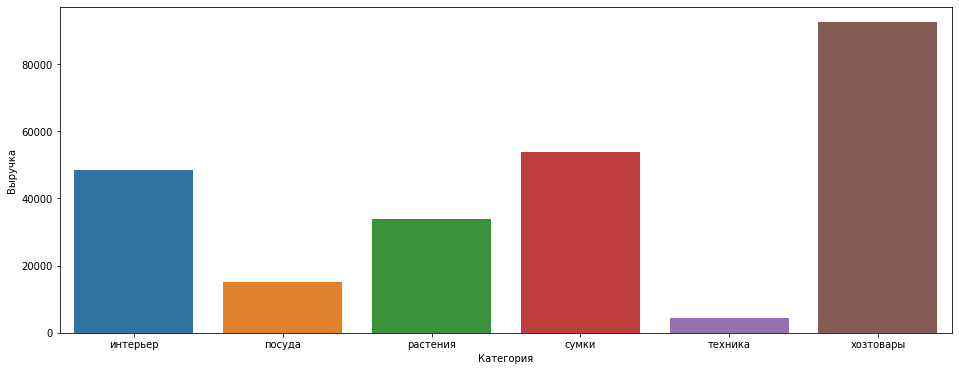

In [52]:
plt.figure(figsize=(16, 6))
sns.barplot(x = 'category', y = 'sales', ci=None, data = temp2)
plt.ylabel('Выручка')
plt.xlabel('Категория')
plt.show()

Общий график продаж по категориям. Самая прибыльная категория - хозтовары.

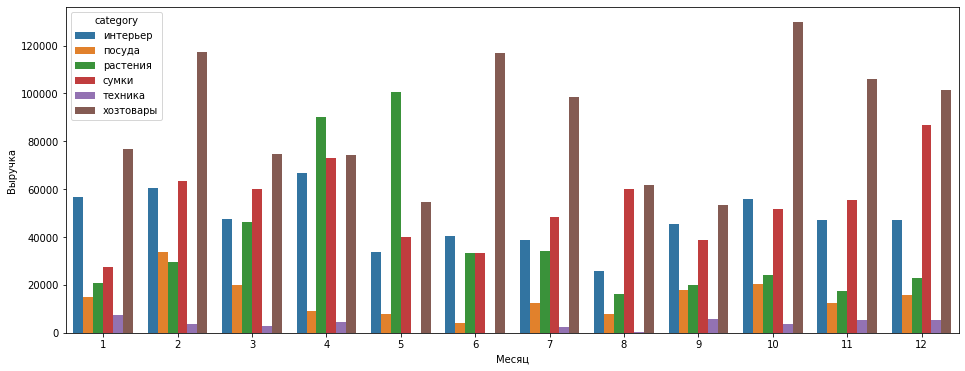

In [53]:
plt.figure(figsize=(16, 6))
sns.barplot(x = 'month', y = 'sales', hue = 'category', ci=None, data = temp2)
plt.ylabel('Выручка')
plt.xlabel('Месяц')
plt.show()

График продаж по месяцам, распределенные по категориям. В большинстве случаев, лидируют хозтовары, но иногда выбиваются вперед и другие категории, такие как - растения и сумки

**Категория: Растения**

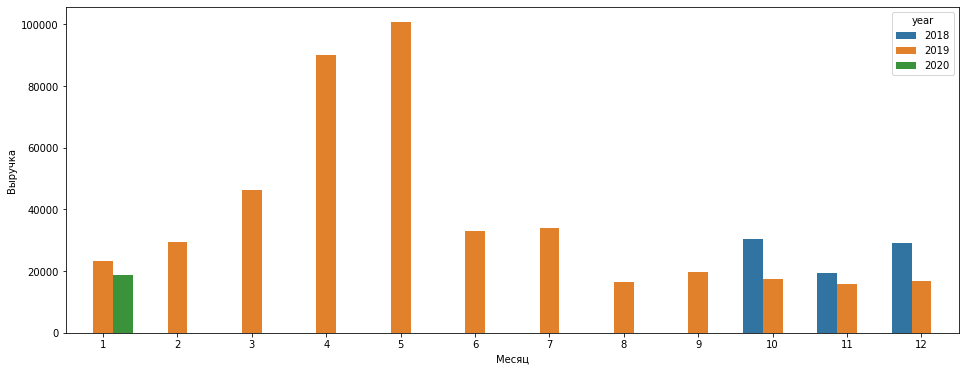

In [54]:
plt.figure(figsize=(16, 6))
sns.barplot(x = 'month', y = 'sales', hue = 'year', ci=None, data = flowers)
plt.ylabel('Выручка')
plt.xlabel('Месяц')
plt.show()

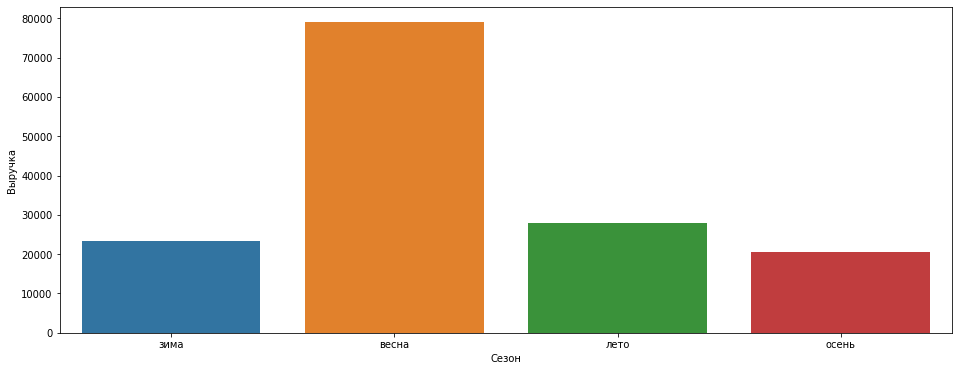

In [55]:
plt.figure(figsize=(16, 6))
sns.barplot(x = 'season', y = 'sales', ci=None, data = flowers)
plt.ylabel('Выручка')
plt.xlabel('Сезон')
plt.show()

Основной приток средств в категории весной, летом прибыль уменьшается, когда же осенью и зимой прибыль минимальна. 

**Категория: Хозтовары**

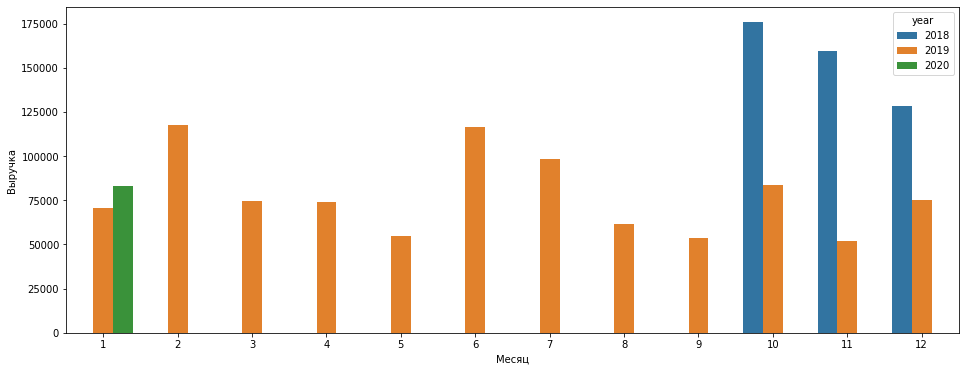

In [56]:
plt.figure(figsize=(16, 6))
sns.barplot(x = 'month', y = 'sales', hue = 'year', ci=None, data = household_goods)
plt.ylabel('Выручка')
plt.xlabel('Месяц')
plt.show()

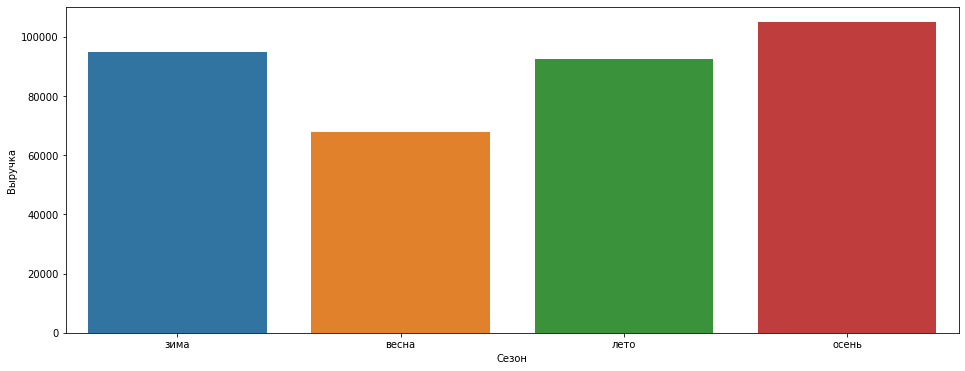

In [57]:
plt.figure(figsize=(16, 6))
sns.barplot(x = 'season', y = 'sales', ci=None, data = household_goods)
plt.ylabel('Выручка')
plt.xlabel('Сезон')
plt.show()

Хозтовары приносят прибыль на одном уровне, но все же лидером является осенее время, а аутсайдером - весна. 

**Категория: Посуда**

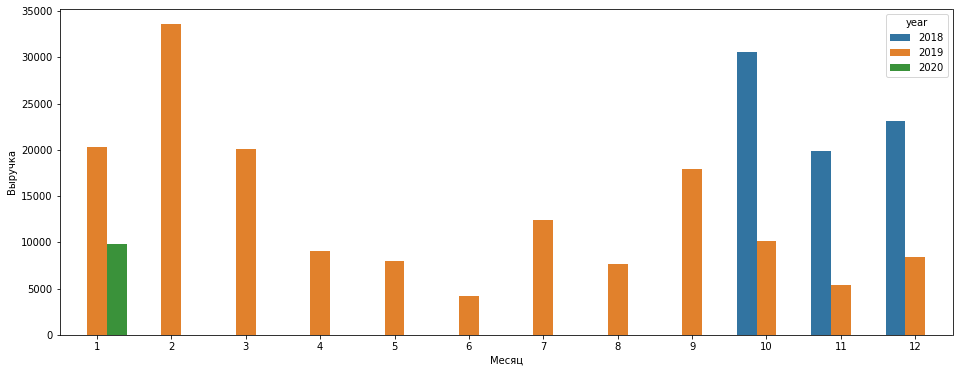

In [58]:
plt.figure(figsize=(16, 6))
sns.barplot(x = 'month', y = 'sales', hue = 'year', ci=None, data = tableware)
plt.ylabel('Выручка')
plt.xlabel('Месяц')
plt.show()

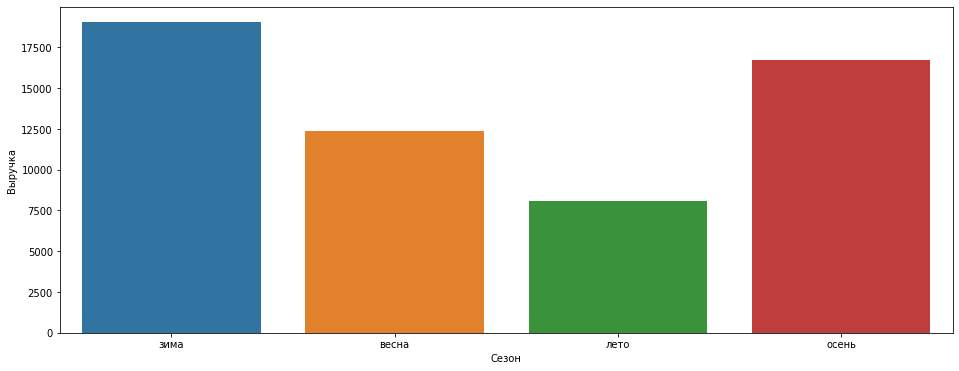

In [59]:
plt.figure(figsize=(16, 6))
sns.barplot(x = 'season', y = 'sales', ci=None, data = tableware)
plt.ylabel('Выручка')
plt.xlabel('Сезон')
plt.show()

Посуда чаще приносит прибыль зимой. 

**Категория: Сумки**

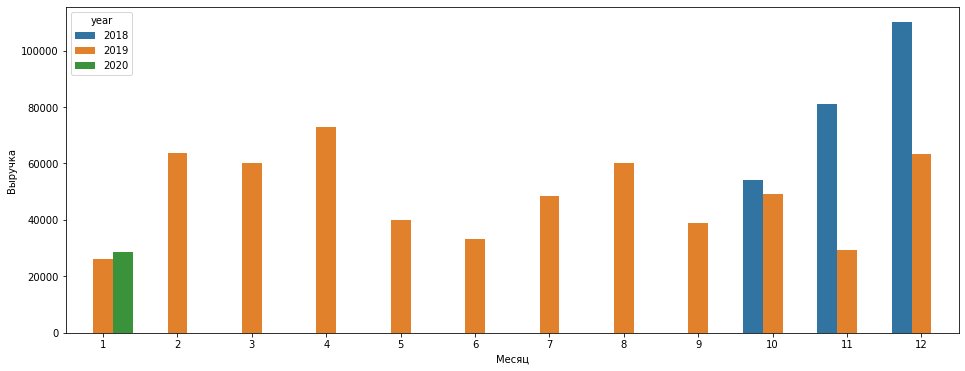

In [60]:
plt.figure(figsize=(16, 6))
sns.barplot(x = 'month', y = 'sales', hue = 'year', ci=None, data = bag)
plt.ylabel('Выручка')
plt.xlabel('Месяц')
plt.show()

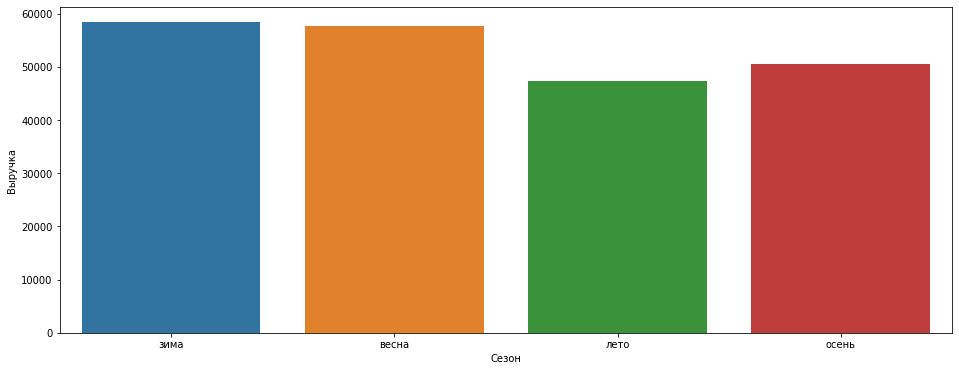

In [61]:
plt.figure(figsize=(16, 6))
sns.barplot(x = 'season', y = 'sales', ci=None, data = bag)
plt.ylabel('Выручка')
plt.xlabel('Сезон')
plt.show()

Сумки больше принесли прибыли весной. 

**Категория: Интерьер**

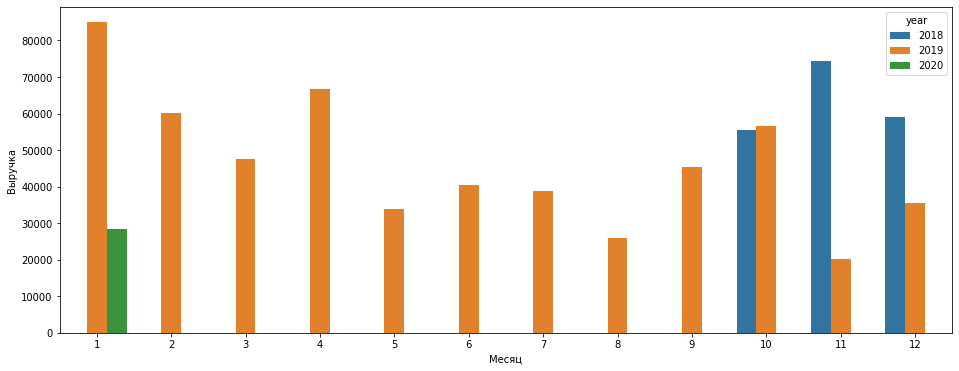

In [62]:
plt.figure(figsize=(16, 6))
sns.barplot(x = 'month', y = 'sales', hue = 'year', ci=None, data = interior_goods)
plt.ylabel('Выручка')
plt.xlabel('Месяц')
plt.show()

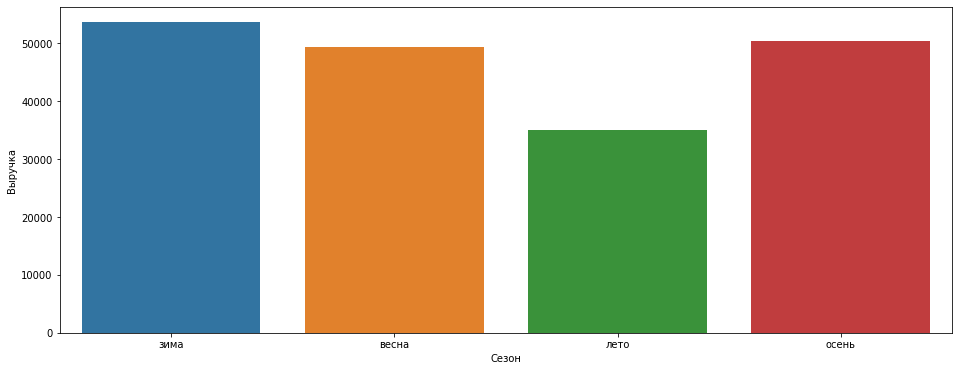

In [63]:
plt.figure(figsize=(16, 6))
sns.barplot(x = 'season', y = 'sales', ci=None, data = interior_goods)
plt.ylabel('Выручка')
plt.xlabel('Сезон')
plt.show()

Зима с весной практически держатся наравне в интерьере. 

**Категория: Техника**

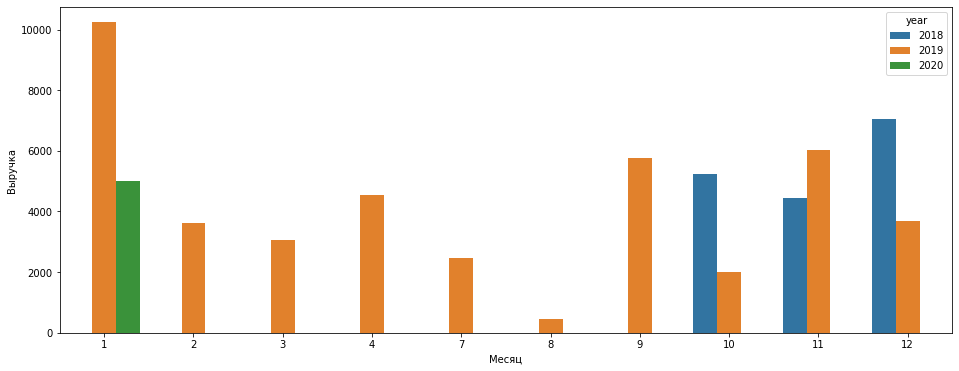

In [64]:
plt.figure(figsize=(16, 6))
sns.barplot(x = 'month', y = 'sales', hue = 'year', ci=None, data = equipment)
plt.ylabel('Выручка')
plt.xlabel('Месяц')
plt.show()

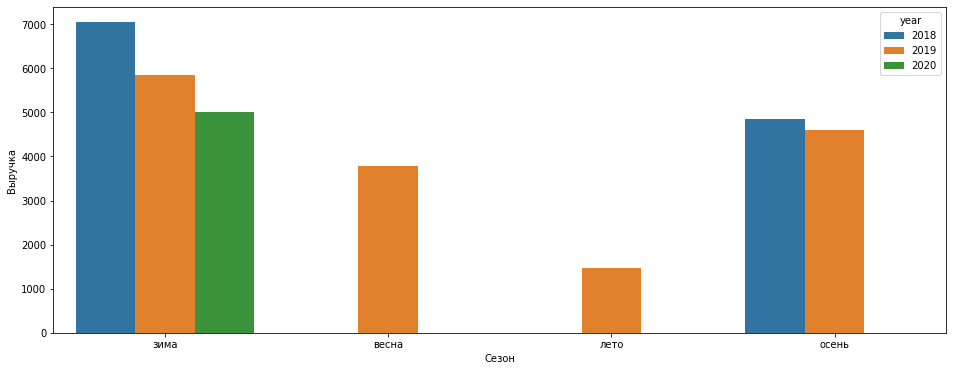

In [65]:
plt.figure(figsize=(16, 6))
sns.barplot(x = 'season', y = 'sales', hue = 'year', ci=None, data = equipment)
plt.ylabel('Выручка')
plt.xlabel('Сезон')
plt.show()

Техника показала себя более прибыльной зимой. Но тем не менее есть сильные просадки летом. 

In [66]:
df.loc[:,['customer_id', 'sales']].groupby('customer_id').sum().sort_values('sales', ascending= False)

,sales
customer_id,
c971fb21-d54c-4134-938f-16b62ee86d3b,159508.0
4d93d3f6-8b24-403b-a74b-f5173e40d7db,57278.0
58a4c3cc-504f-43ea-a74a-bae19e665552,53232.0
146cd9bf-a95c-4afb-915b-5f6684b17444,49432.0
498f12a4-6a62-4725-8516-cf5dc9ab8a3a,41900.0
...,...
eec973c9-6ae9-4c1b-b1c7-a2718fde2f84,22.0
21df03ad-d9ac-47e9-a482-5372fd3e2464,22.0
55b8d928-77f8-40fc-a2e9-08424d13b0e4,22.0


Топ 5 клиентов по затратам

**Итог:** 
По анализу представленных данных мы выяснили, что общая выручка состявляет - 3599031. Так же выяснили, что самы прибыльный период у нас это зима и осень, неудивительно, ведь у нас есть данные  доп данные за зиму 2020 и осень-зиму 2018. Если смотреть в разрезе чисто по 2019 году, самы прибыльный сезон - весна. 
Далее мы распределили заказы по категориям на 6 штук:
1. Растения
2. Хозтовары
3. Посуда
4. Сумки
5. Интерьер 
6. Техника.

По категориям так же проверили информацию по выручке - больше всего денег принесла категория Хозтовары, меньше всего - техника. 

### Сегментация покупателей на основе истории их покупок

Воспользуюсь для выявления сегментов схемой RFM, с небольшими добавками от себя. Добавлю так же разнообразие покупателей в приобретаемых категориях. 

In [67]:
df

,date,customer_id,order_id,product,quantity,price,sales,month,year,date_day,season,product_reduction,category
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,142.0,10,2018,2018-10-01,осень,комнатное растение,растения
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,194.0,10,2018,2018-10-01,осень,комнатное растение,растения
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,112.0,10,2018,2018-10-01,осень,радермахера d-12,растения
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,179.0,10,2018,2018-10-01,осень,хризолидокарпус лутесценс,растения
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,112.0,10,2018,2018-10-01,осень,циперус зумула,растения
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7469,2020-01-30 21:00:00,63208953-a8e4-4f77-9b47-3a46e7b72eee,104002,томата (помидор) черниченский черри № 116 сорт...,2,38.0,76.0,1,2020,2020-01-30,зима,томата (помидор),растения
7470,2020-01-30 22:00:00,d99d25f1-4017-4fcd-8d29-c580cc695a1a,107336,дендробиум санок анна грин 1 ствол d-12 см,1,869.0,869.0,1,2020,2020-01-30,зима,дендробиум санок,растения
7471,2020-01-31 02:00:00,2c9bd08d-8c55-4e7a-9bfb-8c56ba42c6d6,106336,подставка для обуви резиновая attribute 80x40 ...,1,354.0,354.0,1,2020,2020-01-31,зима,подставка для,интерьер
7472,2020-01-31 12:00:00,cdd17932-623e-415f-a577-3b31312fd0e2,102002,тагетис крупноцветковый рассада однолетних цве...,1,128.0,128.0,1,2020,2020-01-31,зима,тагетис крупноцветковый,растения


In [68]:
temp3=['customer_id', 'order_id', 'date_day', 'sales', 'category']
RFM_df=df[temp3]
RFM_df.shape

(5586, 5)

In [69]:
RFM_df

,customer_id,order_id,date_day,sales,category
0,ee47d746-6d2f-4d3c-9622-c31412542920,68477,2018-10-01,142.0,растения
1,ee47d746-6d2f-4d3c-9622-c31412542920,68477,2018-10-01,194.0,растения
2,ee47d746-6d2f-4d3c-9622-c31412542920,68477,2018-10-01,112.0,растения
3,ee47d746-6d2f-4d3c-9622-c31412542920,68477,2018-10-01,179.0,растения
4,ee47d746-6d2f-4d3c-9622-c31412542920,68477,2018-10-01,112.0,растения
...,...,...,...,...,...
7469,63208953-a8e4-4f77-9b47-3a46e7b72eee,104002,2020-01-30,76.0,растения
7470,d99d25f1-4017-4fcd-8d29-c580cc695a1a,107336,2020-01-30,869.0,растения
7471,2c9bd08d-8c55-4e7a-9bfb-8c56ba42c6d6,106336,2020-01-31,354.0,интерьер
7472,cdd17932-623e-415f-a577-3b31312fd0e2,102002,2020-01-31,128.0,растения


In [70]:
NOW = dt.datetime(2020,1,31)
RFM_df['date_day'] = pd.to_datetime(RFM_df['date_day'])
RFM_table=RFM_df.groupby('customer_id').agg({'date_day': lambda x: (NOW - x.max()).days, # Recency
                                                'order_id': lambda x: len(x.unique()), # Frequency
                                                'sales': lambda x: x.sum(), # Monetary
                                                'category': lambda x: len(x.unique())}) #Category     



RFM_table.rename(columns={'date_day': 'recency', 
                         'order_id': 'frequency',
                         'sales': 'monetary_value'}, inplace=True)
RFM_table.head()

,recency,frequency,monetary_value,category
customer_id,,,,
000d6849-084e-4d9f-ac03-37174eaf60c4,107,1,555.0,1
001cee7f-0b29-4716-b202-0042213ab038,349,1,442.0,1
00299f34-5385-4d13-9aea-c80b81658e1b,109,1,914.0,1
002d4d3a-4a59-406b-86ec-c3314357e498,369,1,1649.0,1
003bbd39-0000-41ff-b7f9-2ddaec152037,124,1,2324.0,1


In [71]:
quantiles = RFM_table.quantile(q=[0.25,0.5,0.75])
quantiles

,recency,frequency,monetary_value,category
0.25,74.0,1.0,389.0,1.0
0.50,210.0,1.0,838.5,1.0
0.75,344.0,2.0,1798.0,2.0


In [72]:
quantiles = quantiles.to_dict()

RFM_Segment = RFM_table.copy()

def R_Class(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FM_Class(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
RFM_Segment['R_Quartile'] = RFM_Segment['recency'].apply(R_Class, args=('recency',quantiles,))
RFM_Segment['F_Quartile'] = RFM_Segment['frequency'].apply(FM_Class, args=('frequency',quantiles,))
RFM_Segment['M_Quartile'] = RFM_Segment['monetary_value'].apply(FM_Class, args=('monetary_value',quantiles,))
RFM_Segment['C_Quartile'] = RFM_Segment['category'].apply(FM_Class, args=('category', quantiles,))
RFM_Segment['RFMClass'] = RFM_Segment.R_Quartile.map(str) \
                            + RFM_Segment.F_Quartile.map(str) \
                            + RFM_Segment.M_Quartile.map(str) \
                            + RFM_Segment.C_Quartile.map(str)

In [73]:
RFM_Segment = RFM_Segment.reset_index()

In [74]:
RFM_Segment['RFMClass'].unique()

array(['3121', '1121', '3131', '1131', '3141', '3343', '4311', '4333',
       '4313', '2441', '4343', '2121', '1141', '2111', '3111', '2341',
       '1341', '4341', '3331', '2141', '3333', '4323', '3323', '2131',
       '1111', '2331', '3341', '2311', '1133', '4321', '4331', '1343',
       '3411', '3431', '3313', '1113', '2343', '1143', '2321', '3133',
       '2143', '1321', '3321', '3311', '2133', '1331', '1324', '2421',
       '2123', '2431', '2443', '1144', '1444', '1441', '1421', '1431',
       '1443', '3443', '3421', '1323', '1134', '1311', '3444', '2423',
       '2323', '2333', '4111', '1123', '2444', '3441', '1313', '1124',
       '2144', '2434'], dtype=object)

In [75]:
best_more_category = RFM_Segment[(RFM_Segment['R_Quartile'] == 4) & (RFM_Segment['F_Quartile'] >= 3) &(RFM_Segment['M_Quartile'] == 4) & (RFM_Segment['C_Quartile'] >= 3)].sort_values('monetary_value', ascending=False)
bms = best_more_category['customer_id'].tolist()

In [76]:
best_more_category

,customer_id,recency,frequency,monetary_value,category,R_Quartile,F_Quartile,M_Quartile,C_Quartile,RFMClass
2318,f279d50f-a508-40b4-bde5-5cb4a1be3ad0,31,2,16557.0,2,4,3,4,3,4343
1621,ad66d870-22f5-43bc-958f-73420822586b,68,2,13731.0,2,4,3,4,3,4343
1749,b7dffbd3-810c-4125-889a-454ee093eb73,8,2,10168.0,2,4,3,4,3,4343
1611,ac250053-a236-467a-97d2-ddbb9bf4a1ba,50,2,8684.0,2,4,3,4,3,4343
1672,b16a52b7-499b-4be8-9220-19076ed22bc9,44,2,8307.0,2,4,3,4,3,4343
...,...,...,...,...,...,...,...,...,...,...
923,61d1d23e-085c-4725-9234-e7fc80b6adfb,15,2,1837.0,2,4,3,4,3,4343
2368,f6f64601-5375-4ada-ab77-2ff0acdebbff,19,2,1836.0,2,4,3,4,3,4343
2257,ed2ac5b5-7851-4c5e-8ca7-91b87063f8be,49,2,1828.0,2,4,3,4,3,4343
1364,904015ba-31f2-4ce4-b68e-02362280a43d,2,2,1821.0,2,4,3,4,3,4343


Первый сегмент, лучшие клиенты с разнообразными категориями

In [77]:
best_less_category = RFM_Segment[(RFM_Segment['R_Quartile'] == 4) & (RFM_Segment['F_Quartile'] >= 3) &(RFM_Segment['M_Quartile'] == 4) & (RFM_Segment['C_Quartile'] < 3)].sort_values('monetary_value', ascending=False)
bls = best_less_category['customer_id'].tolist()

In [78]:
best_less_category

,customer_id,recency,frequency,monetary_value,category,R_Quartile,F_Quartile,M_Quartile,C_Quartile,RFMClass
1426,9704352f-7f7f-4fa7-aa1c-64296156a722,36,2,8249.0,1,4,3,4,1,4341
2095,db6caedb-e231-4adc-bcd0-e45b8992f3da,23,2,8203.0,1,4,3,4,1,4341
303,1f502315-d58f-401c-8ba2-88b16e53d0b3,7,2,7993.0,1,4,3,4,1,4341
1257,85716494-dd51-4d1d-ab28-8c74b87f14dc,23,2,7902.0,1,4,3,4,1,4341
835,5853eef2-4e02-4597-a69c-b4e274dce7ae,34,2,7798.0,1,4,3,4,1,4341
505,350505d8-40bf-4405-a296-ca6cfc6869c0,9,2,6336.0,1,4,3,4,1,4341
2354,f5a5bf01-7180-4b07-bda7-13d34d879f45,62,2,6298.0,1,4,3,4,1,4341
1372,91aac803-c8fc-44fd-a1d7-494e16e2ac2d,24,2,5871.0,1,4,3,4,1,4341
220,16e422c6-94fe-4ccf-9c97-05493f3e99c4,13,2,5481.0,1,4,3,4,1,4341
1028,6d27f0da-201b-4630-8678-c6abcf90eaa7,13,2,4273.0,1,4,3,4,1,4341


Второй сегмент, лучшие клиенты без разнообразия в категориях

In [79]:
loyal_more_category = RFM_Segment[(RFM_Segment['F_Quartile'] >= 3) & (RFM_Segment['C_Quartile'] >= 3)].sort_values('monetary_value', ascending=False)
lms = loyal_more_category['customer_id'].tolist()

In [80]:
loyal_more_category

,customer_id,recency,frequency,monetary_value,category,R_Quartile,F_Quartile,M_Quartile,C_Quartile,RFMClass
1915,c971fb21-d54c-4134-938f-16b62ee86d3b,331,126,159508.0,7,2,4,4,4,2444
741,4d93d3f6-8b24-403b-a74b-f5173e40d7db,464,35,57278.0,6,1,4,4,4,1444
698,498f12a4-6a62-4725-8516-cf5dc9ab8a3a,287,4,41900.0,2,2,4,4,3,2443
1100,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,92,17,21361.0,5,3,4,4,4,3444
2318,f279d50f-a508-40b4-bde5-5cb4a1be3ad0,31,2,16557.0,2,4,3,4,3,4343
...,...,...,...,...,...,...,...,...,...,...
1030,6d4bd7d2-52f3-40e4-b394-80da6f977f1f,26,2,138.0,2,4,3,1,3,4313
536,375cde3e-440e-46bd-9a5c-afff1396f277,34,2,138.0,2,4,3,1,3,4313
1928,cab090a5-b8dd-442d-a206-0ef3bf5fc1d8,24,2,120.0,2,4,3,1,3,4313
25,01f95d43-4a8d-45e5-9c23-cccd211e6d30,33,2,118.0,2,4,3,1,3,4313


Третий сегмент, лояльные клиенты с разнообразными категориями 

In [81]:
loyal_less_category = RFM_Segment[(RFM_Segment['F_Quartile'] >= 3) & (RFM_Segment['C_Quartile'] < 3)].sort_values('monetary_value', ascending=False)
lls = loyal_less_category['customer_id'].tolist()

In [82]:
loyal_less_category

,customer_id,recency,frequency,monetary_value,category,R_Quartile,F_Quartile,M_Quartile,C_Quartile,RFMClass
838,58a4c3cc-504f-43ea-a74a-bae19e665552,381,2,53232.000000,1,1,3,4,1,1341
1394,940c175f-ea87-44e0-9e16-0a3d0a9abecd,233,2,20232.000000,1,2,3,4,1,2341
1267,86c97bf1-c834-423e-9e38-8acda68f97e8,410,2,11548.000000,1,1,3,4,1,1341
1580,a9089b7e-e6a5-48f9-9b76-48693b63a092,259,3,11495.000000,1,2,4,4,1,2441
32,02adb72a-3067-45e9-a3b5-f93d79d7496a,301,2,10723.000000,1,2,3,4,1,2341
...,...,...,...,...,...,...,...,...,...,...
2236,eb878d66-20ae-45d5-a189-35b5b10a4c53,10,2,114.666667,1,4,3,1,1,4311
80,07bde29d-a3b1-4d72-9f37-ad5a52b07f25,7,2,112.000000,1,4,3,1,1,4311
452,2f639db6-6ce7-426b-9a6d-edbb9025463c,146,2,95.000000,1,3,3,1,1,3311
1631,ae036d1b-b1d5-41e4-8c85-d2bd1b0b4e18,4,2,88.000000,1,4,3,1,1,4311


Четвертый сегмент, лояльные клиенты без разнообразия в категориях

In [83]:
new_more_category = RFM_Segment[(RFM_Segment['F_Quartile'] == 1) & (RFM_Segment['R_Quartile'] >= 3) & (RFM_Segment['C_Quartile'] >= 3)]
nmc = new_more_category['customer_id'].tolist()

In [84]:
new_more_category

,customer_id,recency,frequency,monetary_value,category,R_Quartile,F_Quartile,M_Quartile,C_Quartile,RFMClass
243,197e747c-e8c6-4874-af3c-a7d857b82afb,143,1,853.0,2,3,1,3,3,3133


Пятый сегмент, новые клиенты с разнообразием в категориях

In [85]:
new_less_category = RFM_Segment[(RFM_Segment['F_Quartile'] == 1) & (RFM_Segment['R_Quartile'] >= 3) & (RFM_Segment['C_Quartile'] < 3)]
nlc = new_less_category['customer_id'].tolist()

In [86]:
new_less_category

,customer_id,recency,frequency,monetary_value,category,R_Quartile,F_Quartile,M_Quartile,C_Quartile,RFMClass
0,000d6849-084e-4d9f-ac03-37174eaf60c4,107,1,555.0,1,3,1,2,1,3121
2,00299f34-5385-4d13-9aea-c80b81658e1b,109,1,914.0,1,3,1,3,1,3131
4,003bbd39-0000-41ff-b7f9-2ddaec152037,124,1,2324.0,1,3,1,4,1,3141
11,00e59a12-06d5-47fc-9a33-bfc53aca1e9f,202,1,1798.0,1,3,1,3,1,3131
13,0114e87e-78e2-49bf-9c8c-bbddd7191a3f,108,1,974.0,1,3,1,3,1,3131
...,...,...,...,...,...,...,...,...,...,...
2429,fd4bc7b8-6ad6-4077-8e63-3593ab5e1cfd,126,1,1087.0,1,3,1,3,1,3131
2442,ff0c73c3-6b62-4e67-8e12-bb83ed1851d5,93,1,899.0,1,3,1,3,1,3131
2446,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,93,1,397.0,1,3,1,2,1,3121
2448,ffb80538-3fda-4351-8ea9-9d2bec58bb07,144,1,974.0,1,3,1,3,1,3131


Шестой сегмент, новые клиенты без разнообразия в категориях

In [87]:
facet_more_category = RFM_Segment[(RFM_Segment['R_Quartile'] <= 2) & (RFM_Segment['C_Quartile'] >= 3)].sort_values('monetary_value', ascending=False)
fmc = facet_more_category['customer_id'].tolist()

In [88]:
facet_more_category

,customer_id,recency,frequency,monetary_value,category,R_Quartile,F_Quartile,M_Quartile,C_Quartile,RFMClass
1915,c971fb21-d54c-4134-938f-16b62ee86d3b,331,126,159508.0,7,2,4,4,4,2444
741,4d93d3f6-8b24-403b-a74b-f5173e40d7db,464,35,57278.0,6,1,4,4,4,1444
698,498f12a4-6a62-4725-8516-cf5dc9ab8a3a,287,4,41900.0,2,2,4,4,3,2443
1359,8fba3604-ef57-4b9f-b2fe-3402fa8825c8,428,1,33680.0,2,1,1,4,3,1143
1505,9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f,462,1,22056.0,3,1,1,4,4,1144
...,...,...,...,...,...,...,...,...,...,...
2375,f7e11f53-18cc-4699-8da5-1d5c5e47349b,280,1,426.0,2,2,1,2,3,2123
192,13f31376-e99b-4a4a-a538-8a5dc64f6599,436,1,380.0,2,1,1,1,3,1113
369,278cffb9-4414-449a-8cb8-ffdbef1bf1d8,434,1,363.0,2,1,1,1,3,1113
672,45d39ca2-c2f6-456e-8a79-89988c74515c,460,1,328.0,2,1,1,1,3,1113


Седьмой сегмент, клиенты на грани оттока с разнообразием в категориях

In [89]:
facet_less_category = RFM_Segment[(RFM_Segment['R_Quartile'] <= 2) & (RFM_Segment['C_Quartile'] < 3) & (RFM_Segment['RFMClass'] != '1111')].sort_values('monetary_value', ascending=False)
flc = facet_less_category['customer_id'].tolist()

In [90]:
facet_less_category

,customer_id,recency,frequency,monetary_value,category,R_Quartile,F_Quartile,M_Quartile,C_Quartile,RFMClass
838,58a4c3cc-504f-43ea-a74a-bae19e665552,381,2,53232.0,1,1,3,4,1,1341
199,146cd9bf-a95c-4afb-915b-5f6684b17444,234,1,49432.0,1,2,1,4,1,2141
992,6987e6d6-a63a-4ce2-a2d0-f424092d235e,406,1,32718.0,1,1,1,4,1,1141
267,1b2764ad-9151-4051-a46a-9b01b62e6335,451,1,24370.0,1,1,1,4,1,1141
1394,940c175f-ea87-44e0-9e16-0a3d0a9abecd,233,2,20232.0,1,2,3,4,1,2341
...,...,...,...,...,...,...,...,...,...,...
2224,e9e94e71-4cd2-47fc-9b3f-1ec96bd2d95e,283,1,22.0,1,2,1,1,1,2111
2038,d5660bff-407f-463d-b2ff-e90a9ca05976,289,1,22.0,1,2,1,1,1,2111
691,48788184-498b-49da-955e-7737bf7c9047,283,1,22.0,1,2,1,1,1,2111
408,2b6439c9-1ae1-4785-9509-ca4348b3d39a,277,1,22.0,1,2,1,1,1,2111


Восьмой сегмент, клиенты на грани оттока без разнообразия в категориях

In [91]:
missed = RFM_Segment[RFM_Segment['RFMClass']=='1111'].sort_values('recency',ascending=False)
m = missed['customer_id'].tolist()

In [92]:
missed

,customer_id,recency,frequency,monetary_value,category,R_Quartile,F_Quartile,M_Quartile,C_Quartile,RFMClass
904,5f75c73a-1305-4079-b040-2bcb42085002,486,1,299.0,1,1,1,1,1,1111
390,29a514f5-a27e-4939-85d5-874a0c3f7a2c,486,1,193.0,1,1,1,1,1,1111
478,32a85453-f14d-40c2-90ba-3851498a5f3b,486,1,374.0,1,1,1,1,1,1111
2291,f08d9018-438e-4e96-b519-f74c0302a433,486,1,359.0,1,1,1,1,1,1111
2276,eee7b1fa-ba81-4049-add6-370ee5e62e72,485,1,187.0,1,1,1,1,1,1111
...,...,...,...,...,...,...,...,...,...,...
728,4c177878-f465-421f-b7c2-4785d67c66d3,347,1,300.0,1,1,1,1,1,1111
2238,eb8a6adb-9211-4973-97c4-85f4f2695363,346,1,88.0,1,1,1,1,1,1111
2009,d220a441-2ed1-428e-8f3f-966beb50bd0e,345,1,314.0,1,1,1,1,1,1111
545,384c1e4b-ac85-44bf-8968-4377d626e983,345,1,134.0,1,1,1,1,1,1111


Девятый сегмент, упущенные клиенты

In [93]:
def segmentation(id):
    if id in bms:
        return 1
    if id in bls:
        return 2
    if id in lms:
        return 3
    if id in lls:
        return 4
    if id in nmc:
        return 5
    if id in nlc:
        return 6
    if id in fmc:
        return 7
    if id in flc:
        return 8
    if id in m:
        return 9
    else:
        return 0

In [94]:
RFM_Segment['segment'] = RFM_Segment['customer_id'].apply(segmentation)
RFM_Segment

,customer_id,recency,frequency,monetary_value,category,R_Quartile,F_Quartile,M_Quartile,C_Quartile,RFMClass,segment
0,000d6849-084e-4d9f-ac03-37174eaf60c4,107,1,555.0,1,3,1,2,1,3121,6
1,001cee7f-0b29-4716-b202-0042213ab038,349,1,442.0,1,1,1,2,1,1121,8
2,00299f34-5385-4d13-9aea-c80b81658e1b,109,1,914.0,1,3,1,3,1,3131,6
3,002d4d3a-4a59-406b-86ec-c3314357e498,369,1,1649.0,1,1,1,3,1,1131,8
4,003bbd39-0000-41ff-b7f9-2ddaec152037,124,1,2324.0,1,3,1,4,1,3141,6
...,...,...,...,...,...,...,...,...,...,...,...
2445,ff601403-b094-4b86-9ac6-264d725b9277,12,2,1739.0,2,4,3,3,3,4333,3
2446,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,93,1,397.0,1,3,1,2,1,3121,6
2447,ffb5976a-7a4d-460b-95c4-5ffaba31cb24,413,1,389.0,1,1,1,1,1,1111,9
2448,ffb80538-3fda-4351-8ea9-9d2bec58bb07,144,1,974.0,1,3,1,3,1,3131,6


In [95]:
RFM_Segment['segment'].unique()

array([6, 8, 3, 4, 1, 2, 9, 7, 5])

Всех распределили по сегментам

Мы получили 9 типов клиентов распределены они следующим образом:
1. Лучшие клиенты которые закупаются в разных категориях - их 143 
2. Лучшие клиенты которые закупаются в одной категории - их 34
3. Лояльные клиенты которые закупаются в разных категориях - их 563
4. Лояльные клиенты которые закупаются в одной категории - их 289
5. Новые клиенты которые закупаются в разных категориях - тут всего 1 такой клиент
6. Новые клиенты которые закупаются в одной категории - их 341
7. Клиенты на грани оттока которые закупались в разных категориях - их 58
8. Клиенты на грани оттока которые закупались в одной категории - их 899
9. Упущенные клиенты - из 135

Таким образом можно можно выяснить насколько клиент готов к оформлению заказа на платформе и сколько выручки он принесет.

Дополнительно добавим к каждому клиенту в каких категориях он приобретает товар.

In [96]:
df = df.merge(RFM_Segment[['segment', 'customer_id']], how='left', left_on='customer_id', right_on='customer_id')

In [97]:
df

,date,customer_id,order_id,product,quantity,price,sales,month,year,date_day,season,product_reduction,category,segment
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,142.0,10,2018,2018-10-01,осень,комнатное растение,растения,8
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,194.0,10,2018,2018-10-01,осень,комнатное растение,растения,8
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,112.0,10,2018,2018-10-01,осень,радермахера d-12,растения,8
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,179.0,10,2018,2018-10-01,осень,хризолидокарпус лутесценс,растения,8
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,112.0,10,2018,2018-10-01,осень,циперус зумула,растения,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5581,2020-01-30 21:00:00,63208953-a8e4-4f77-9b47-3a46e7b72eee,104002,томата (помидор) черниченский черри № 116 сорт...,2,38.0,76.0,1,2020,2020-01-30,зима,томата (помидор),растения,3
5582,2020-01-30 22:00:00,d99d25f1-4017-4fcd-8d29-c580cc695a1a,107336,дендробиум санок анна грин 1 ствол d-12 см,1,869.0,869.0,1,2020,2020-01-30,зима,дендробиум санок,растения,1
5583,2020-01-31 02:00:00,2c9bd08d-8c55-4e7a-9bfb-8c56ba42c6d6,106336,подставка для обуви резиновая attribute 80x40 ...,1,354.0,354.0,1,2020,2020-01-31,зима,подставка для,интерьер,3
5584,2020-01-31 12:00:00,cdd17932-623e-415f-a577-3b31312fd0e2,102002,тагетис крупноцветковый рассада однолетних цве...,1,128.0,128.0,1,2020,2020-01-31,зима,тагетис крупноцветковый,растения,3


In [98]:
fl = df.query('category == "растения"')
hg = df.query('category == "хозтовары"')
da = df.query('category == "посуда"')
ba = df.query('category == "сумки"')
ig = df.query('category == "интерьер"')
eq = df.query('category == "техника"')

In [99]:
fl1 = fl['customer_id'].unique().tolist()

In [100]:
def cat(id):
    if id in fl1:
        return '+'
    else:
        return '-'

In [101]:
df['flowers'] = df['customer_id'].apply(cat)

In [102]:
hg1 = hg['customer_id'].unique().tolist()

In [103]:
def cat2(id):
    if id in hg1:
        return '+'
    else:
        return '-'

In [104]:
df['household_goods'] = df['customer_id'].apply(cat2)

In [105]:
da1 = da['customer_id'].unique().tolist()

In [106]:
def cat3(id):
    if id in da1:
        return '+'
    else:
        return '-'

In [107]:
df['tableware'] = df['customer_id'].apply(cat3)

In [108]:
ba1 = ba['customer_id'].unique().tolist()

In [109]:
def cat4(id):
    if id in ba1:
        return '+'
    else:
        return '-'

In [110]:
df['bags'] = df['customer_id'].apply(cat4)

In [111]:
ig1 = ig['customer_id'].unique().tolist()

In [112]:
def cat5(id):
    if id in ig1:
        return '+'
    else:
        return '-'

In [113]:
df['interior_goods'] = df['customer_id'].apply(cat5)

In [114]:
eq1 = eq['customer_id'].unique().tolist()

In [115]:
def cat6(id):
    if id in eq1:
        return '+'
    else:
        return '-'

In [116]:
df['equipment'] = df['customer_id'].apply(cat6)

In [117]:
df

,date,customer_id,order_id,product,quantity,price,sales,month,year,date_day,season,product_reduction,category,segment,flowers,household_goods,tableware,bags,interior_goods,equipment
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,142.0,10,2018,2018-10-01,осень,комнатное растение,растения,8,+,-,-,-,-,-
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,194.0,10,2018,2018-10-01,осень,комнатное растение,растения,8,+,-,-,-,-,-
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,112.0,10,2018,2018-10-01,осень,радермахера d-12,растения,8,+,-,-,-,-,-
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,179.0,10,2018,2018-10-01,осень,хризолидокарпус лутесценс,растения,8,+,-,-,-,-,-
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,112.0,10,2018,2018-10-01,осень,циперус зумула,растения,8,+,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5581,2020-01-30 21:00:00,63208953-a8e4-4f77-9b47-3a46e7b72eee,104002,томата (помидор) черниченский черри № 116 сорт...,2,38.0,76.0,1,2020,2020-01-30,зима,томата (помидор),растения,3,+,+,-,-,-,-
5582,2020-01-30 22:00:00,d99d25f1-4017-4fcd-8d29-c580cc695a1a,107336,дендробиум санок анна грин 1 ствол d-12 см,1,869.0,869.0,1,2020,2020-01-30,зима,дендробиум санок,растения,1,+,-,-,+,-,-
5583,2020-01-31 02:00:00,2c9bd08d-8c55-4e7a-9bfb-8c56ba42c6d6,106336,подставка для обуви резиновая attribute 80x40 ...,1,354.0,354.0,1,2020,2020-01-31,зима,подставка для,интерьер,3,-,+,-,-,+,-
5584,2020-01-31 12:00:00,cdd17932-623e-415f-a577-3b31312fd0e2,102002,тагетис крупноцветковый рассада однолетних цве...,1,128.0,128.0,1,2020,2020-01-31,зима,тагетис крупноцветковый,растения,3,+,+,-,-,-,-


Теперь мы получили данные, где клиенты, в каких категориях они закупаются и разбиты на сегменты.

In [118]:
oo = pd.pivot_table(df, index=['segment', 'customer_id'], values='product', aggfunc='count')
oo = oo.reset_index()
oo

,segment,customer_id,product
0,1,01a53da1-c3ae-47cf-916e-7e345fe2f2bc,2
1,1,04416514-5346-4f90-93e3-fb7365e2ee8c,2
2,1,04f4acb1-8c6d-4e1c-a960-3fa400d220a7,2
3,1,06a80fd5-29ea-4204-a7df-de6b6c30119a,2
4,1,09a5e5d4-be3f-4c62-a2c6-8bb3f2c39df5,2
...,...,...,...
2445,9,f9a15108-149f-4b97-9888-2f0dd450cb06,1
2446,9,fba5e196-8533-4805-bca4-6abc919ff10d,1
2447,9,fe7fbb35-03de-4f95-9386-14439d62c03e,1
2448,9,fe99fee2-d40c-4ef9-a589-8679f42076fa,1


In [119]:
ow = oo.groupby('segment')[['product', 'customer_id']].agg({'product': 'sum', 'customer_id': 'count'})
ow['average_count'] = ow['product']/ow['customer_id']
ow

,product,customer_id,average_count
segment,,,
1,320,160,2.000000
2,80,40,2.000000
3,1101,416,2.646635
4,877,280,3.132143
5,2,1,2.000000
6,602,443,1.358916
7,334,48,6.958333
8,2106,915,2.301639
9,164,147,1.115646


Среднее количество заказов на клиента по сегментам

In [120]:
joja = pd.pivot_table(df, index='segment', values='sales',)
joja

,sales
segment,
1,1825.443750
2,1849.300000
3,659.542310
4,532.638921
5,426.500000
6,853.790698
7,434.703593
8,638.547483
9,194.603659


Средняя выручка на клиента в каждом сегменте.

**Выручка: Растения**

In [121]:
foo = df[df['flowers'] == '+']
pd.pivot_table(foo, index='segment', values='sales')

,sales
segment,
1,1596.138889
2,959.000000
3,613.458498
4,176.518730
6,235.296154
7,202.169811
8,202.141460
9,176.735849


**Выручка: Хозтовары**

In [122]:
hoo = df[df['household_goods'] == '+']
pd.pivot_table(hoo, index='segment', values='sales')

,sales
segment,
1,1840.782967
2,1851.125000
3,773.243944
4,780.678131
5,426.500000
6,1478.191176
7,541.157205
8,1620.147766
9,191.893617


**Выручка: Посуда**

In [123]:
too = df[df['tableware'] == '+']
pd.pivot_table(too, index='segment', values='sales')

,sales
segment,
1,1830.089286
2,1371.750000
3,797.479529
4,547.731707
6,826.600000
7,788.157895
8,903.355140
9,197.347826


**Выручка: Сумки**

In [124]:
boo = df[df['bags'] == '+']
pd.pivot_table(boo, index='segment', values='sales')

,sales
segment,
1,2219.108209
2,2811.750000
3,1019.312722
4,2261.859375
6,1595.120690
7,724.438596
8,2216.844828
9,374.000000


**Выручка: Интерьер**

In [125]:
ioo = df[df['interior_goods'] == '+']
pd.pivot_table(ioo, index='segment', values='sales')

,sales
segment,
1,1673.578431
2,1913.200000
3,846.452135
4,1488.620155
5,426.500000
6,1191.650000
7,471.971154
8,945.194444
9,202.540541


**Выручка: Техника**

In [126]:
eoo = df[df['equipment'] == '+']
pd.pivot_table(eoo, index='segment', values='sales')

,sales
segment,
1,1465.300000
2,918.000000
3,1072.799458
4,1011.500000
6,964.000000
7,746.888889
8,1135.800000


Выручка средняя выручка клиентов в категориях по сегментам

**Итог:**
Если смотреть среднюю выручку в категориях, то самая прибыльная - сумки, а самая неприбыльная - техника. В целом если смотреть, все категории не сильно разнятся от общей средней выручки. Самые частые заказы оформляются в сегменте клиентов на грани оттока, то есть ранее они делали много заказов, но в какой-то момент перестали пользоваться. Интересно почему, может появился более серьезный конкурент..

### Проверка статистических гипотез

Мы будем сравнивать гипотезы по слудующим признакам:
1. Разделим общее колличество клиентов на тех кто закупаются в разных категориях и на тех кто приобретал товары в одной категории.
2. Сравним типы пользователей без разделения в количествах категорий.

Первая гипотеза

H0: Нет разницы в средней выручке между сегментами \
H1: Есть разница в средней выручке между сегментами

In [127]:
category_A = RFM_Segment[(RFM_Segment['segment'] == 1) | (RFM_Segment['segment'] == 3) | (RFM_Segment['segment'] == 5) | (RFM_Segment['segment'] == 7)]
category_B = RFM_Segment[(RFM_Segment['segment'] == 2) | (RFM_Segment['segment'] == 4) | (RFM_Segment['segment'] == 6) | (RFM_Segment['segment'] == 8)]

In [128]:
best = RFM_Segment[(RFM_Segment['segment'] == 1) | (RFM_Segment['segment'] == 2)]
loyal = RFM_Segment[(RFM_Segment['segment'] == 3) | (RFM_Segment['segment'] == 4)]
new = RFM_Segment[(RFM_Segment['segment'] == 5) | (RFM_Segment['segment'] == 6)]
facet = RFM_Segment[(RFM_Segment['segment'] == 7) | (RFM_Segment['segment'] == 8)]

In [129]:
def test(x, y):
    result = st.mannwhitneyu(x, y)

    alpha = .05

    print(result.pvalue)
    
    if result.pvalue < alpha:
        print('Отвергаем нулевую гипотезу')
    elif result.pvalue > alpha:
        print('Не получилось отвергнуть нулевую гипотезу')


In [130]:
category_A_first = category_A['monetary_value']
category_B_first = category_B['monetary_value']

In [131]:
best_first = best['monetary_value']
loyal_first = loyal['monetary_value']
new_first = new['monetary_value']
facet_first = facet['monetary_value']

In [132]:
test(category_A_first, category_B_first)

2.312928620176911e-18
Отвергаем нулевую гипотезу


In [133]:
test(best_first, loyal_first)

2.6345854536049748e-73
Отвергаем нулевую гипотезу


In [134]:
test(best_first, new_first)

7.059373793519649e-61
Отвергаем нулевую гипотезу


In [135]:
test(best_first, facet_first)

3.883006518959729e-67
Отвергаем нулевую гипотезу


In [136]:
test(loyal_first, new_first)

7.90985671401227e-06
Отвергаем нулевую гипотезу


In [137]:
test(loyal_first, facet_first)

0.05412192304874406
Не получилось отвергнуть нулевую гипотезу


In [138]:
test(new_first, facet_first)

7.670199323775281e-09
Отвергаем нулевую гипотезу


По первой гипотезе все категории между собой имеют разницу в выручке, кроме пары Лояльных и клиентов которые на грани оттока.

Вторая гипотеза

H0: Нет разницы в частоте оформления заказов между сегментами \
H1: Есть разница в частоте оформления заказов между сегментами

In [139]:
category_A_second = category_A['frequency']
category_B_second = category_B['frequency']

In [140]:
best_second = best['frequency']
loyal_second = loyal['frequency']
new_second = new['frequency']
facet_second = facet['frequency']

In [141]:
test(category_A_second, category_B_second)

3.042092878675181e-218
Отвергаем нулевую гипотезу


In [142]:
test(best_second, loyal_second)

0.003983051027568818
Отвергаем нулевую гипотезу


In [143]:
test(best_second, new_second)

7.492649385651677e-142
Отвергаем нулевую гипотезу


In [144]:
test(best_second, facet_second)

1.1129931911337852e-254
Отвергаем нулевую гипотезу


In [145]:
test(loyal_second, new_second)

7.39409406585942e-241
Отвергаем нулевую гипотезу


In [146]:
test(loyal_second, facet_second)

0.0
Отвергаем нулевую гипотезу


In [147]:
test(facet_second, new_second)

1.0
Не получилось отвергнуть нулевую гипотезу


По второй гипотезе такая же ситуация, разницы в частоте оформления есть. Едниственная пара, где нет разницы - клиенты на грани оттока и новые клиенты.

### Вывод

1. По данным определили, что самый большой поток заказов - Зима. 
2. Самый прибыльные месяца - Июнь 2019 и Октябрь 2018
3. Самая крупная категория - Хозтовары
4. В весеннее время чаще всего приобретают: Растения - Сумки - Интерьер
5. В осенне время чаще всего приобретают: Хозтовар 
6. В зимнее время чаще всего приобретают: Техника - посуда 
7. Получили 9 видов пользователей, которые отличаются друг от друга: Частотой приобретения товаров, прибылью для магазина, разнообразием категорий в которых приобретают товар и как давно приобретали товар.

**Рекомендации:**
1. Первый сегмент - лучшие клиенты в разных категориях, на них стоит заострить внимание в плане удержания их на сервисе. Более частые предложения например, тем более клиенты разностороние в плане категорий, будет проще реализовать их удержание.
2. Второй сегмент - лучшие клиенты, но ориентированы на одной категории. Тут в целом ситуация схожа с первыми, единственное что, нужно придумать, как таких клиентов заинтересовать другими категориями, может какие-нибудь промо предложения в других категориях.
3. Третий сегмент - лояльные клиенты, с ними достаточно будет удержать на прежнем уровне, ведь они и так приносят больше чем средний доход. В дополнение, можно больше продвигать товаров для них, чтобы они перешли в первый сегмент.
4. Четвертый сегмент - лояльные клиенты без разнообразия в категориях. Клиентов стоит заинтересовать в разнообразии категорий, они лояльны, приобретают достаточно, но они могут перейти так же в 1 сегмент, если привлеч внимание к другим категориям. 
5. Пятый сегмент - новые клиенты, одни из важных клиентов, т.к. они познакомились с сервисом не так давно и главное это сохранить их. Специальные предложения, частая таргетированая реклама поможет в удержании. Но суть в том, что в этом сегменте всего 1 клиент. Оттедльных подход к нему прорабатывать не стоит, а например воспользоваться методом для 6 сегмента.
6. Шестой сегмент - новые клиенты, без разнообразия в категориях. Ситуация схожа с 5 сегментом. Едниственное что, они узконаправлены на нужную категорию. Стоит привлечь внимания на расширение потреблений в других категориях. Промо и реклама поможет удержании и расширении потреблений. 
7. Седьмой сегмент - клиенты на грани оттока, клиенты вот-вот пропадут с сервиса. На них стоит обратиться особое внимание, ведь в этом сегменте самый большой показатель по среднему заказу на клиента. Раньше они закупались довольно регулярно, стоит привлечь их внимание вновь всеми возможными силами.
8. Восьмой сегмент - клиенты на гранни оттока, без разнообразия в категориях. Этот сегмент тоже очень важен, ведь тут самый большой процент клиентов по сравнения с остальными. Стоит проработать схему по возврату этих клиентов, при удачной компании, вернется большое количество клиентов, что безусловно скажется в лучшую сторону на бизнес. 
9. Девятый сегмент - клиенты ушедшие с сервиса. Этих клиентов мы практически утеряли, но т.к. они еще остались в базе, есть шанс их вернуть. Активная реклама с промо, возможно вернут их.

Подведя итоги, стоит в первую очередь стоит проработать клиентов на грани оттока(7 и 8), там самый большой процент клиентов и самые активные клиенты в плане заказов на душу. Во вторую очередь стоит обратить внимание на новых клиентов(5 и 6), клиенты новые, подход нужен один на всех, ведь в 5 сегменте один клиент. Далее стоит попробовать вернуть 9 сегмент - клиентов ушедших с сервиса. Первые четыре сегмента(1, 2, 3, 4) стоит придерживать +- той же политики как и сейчас, у них все хорошо, но все же не стоит их забывать совсем, привлечение их внимание к сервису - это и есть удержание их в магазине. 

In [148]:
df.to_csv('dash_visits.csv', index=False)

In [149]:
test_visits = pd.read_csv('dash_visits.csv')
test_visits

,date,customer_id,order_id,product,quantity,price,sales,month,year,date_day,season,product_reduction,category,segment,flowers,household_goods,tableware,bags,interior_goods,equipment
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,142.0,10,2018,2018-10-01,осень,комнатное растение,растения,8,+,-,-,-,-,-
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,194.0,10,2018,2018-10-01,осень,комнатное растение,растения,8,+,-,-,-,-,-
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,112.0,10,2018,2018-10-01,осень,радермахера d-12,растения,8,+,-,-,-,-,-
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,179.0,10,2018,2018-10-01,осень,хризолидокарпус лутесценс,растения,8,+,-,-,-,-,-
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,112.0,10,2018,2018-10-01,осень,циперус зумула,растения,8,+,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5581,2020-01-30 21:00:00,63208953-a8e4-4f77-9b47-3a46e7b72eee,104002,томата (помидор) черниченский черри № 116 сорт...,2,38.0,76.0,1,2020,2020-01-30,зима,томата (помидор),растения,3,+,+,-,-,-,-
5582,2020-01-30 22:00:00,d99d25f1-4017-4fcd-8d29-c580cc695a1a,107336,дендробиум санок анна грин 1 ствол d-12 см,1,869.0,869.0,1,2020,2020-01-30,зима,дендробиум санок,растения,1,+,-,-,+,-,-
5583,2020-01-31 02:00:00,2c9bd08d-8c55-4e7a-9bfb-8c56ba42c6d6,106336,подставка для обуви резиновая attribute 80x40 ...,1,354.0,354.0,1,2020,2020-01-31,зима,подставка для,интерьер,3,-,+,-,-,+,-
5584,2020-01-31 12:00:00,cdd17932-623e-415f-a577-3b31312fd0e2,102002,тагетис крупноцветковый рассада однолетних цве...,1,128.0,128.0,1,2020,2020-01-31,зима,тагетис крупноцветковый,растения,3,+,+,-,-,-,-
